In [1]:
import scrapy
import re
import pandas as pd

from scrapy.crawler import CrawlerProcess

class CryptoSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "Crypto"
    
    # URL(s) to start with.
    start_urls = [
        'https://www.reddit.com/r/CryptoCurrency/',
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        
        print(response.xpath('//div[@data-context = "listing"]'))
        # Iterate over every listing in /r/cryptocurrency
        for topic in response.xpath('//div[@data-context = "listing"]'):
            
            # Yield a dictionary with the values we want.
            #xpath only works when you haven't voted on a topic
            
            
            yield {
                'title': topic.xpath('div[@class = "entry unvoted"]/div[@class ="top-matter"]/p[@class = "title"]/a/text()').extract_first(),
                'author': topic.xpath('div[@class = "entry unvoted"]/div[@class ="top-matter"]/p[@class = "tagline "]/a/text()').extract_first()
            }
            

            
        # Get the URL of the next page.
        next_page = response.xpath('//span[@class = "next-button"]/a/@href').extract_first()
        
        # There are a LOT of pages here.  For our example, we'll just scrape the first 9.
        # This finds the page number. The next segment of code prevents us from going beyond page 9.
        pagenum = int(re.findall(r'\d+',next_page)[0])
        
        print(pagenum)
        
        # Recursively call the spider to run on x pages, if it exists.
        pages = 5
        
        
        if next_page is not None and pagenum <= pages*25:
            next_page = response.urljoin(next_page)
            # Request the next page and recursively parse it the same way we did above
            yield scrapy.Request(next_page, callback=self.parse)

# Tell the script how to run the crawler by passing in settings.
# The new settings have to do with scraping etiquette.          
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'data.json',       # Name our storage file.
    'LOG_ENABLED': False,          # Turn off logging for now.
    'ROBOTSTXT_OBEY': False,
    #'USER_AGENT': 'ThinkfulDataScienceBootcampCrawler (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': False
})

# Start the crawler with our spider.
process.crawl(CryptoSpider)
process.start()
print('Success!')

[]
Success!


In [2]:
# Checking whether we got data from all 9 pages
df=pd.read_json('data.json', orient='records')
print(df.shape)
print(df.head())

(27, 2)
              author                                              title
0  CryptoCurrencyMod  Monthly Skeptics Discussion - June, 2018 | Pro...
1  CryptoCurrencyMod         Daily Discussion Megathread - June 7, 2018
2              dmcb1  A good friend of mine has passed. (A crypto le...
3            Yayowam  World's First Korean-Government-backed Blockch...
4            GSDDuke  Big event for Crypto. This should spark custod...


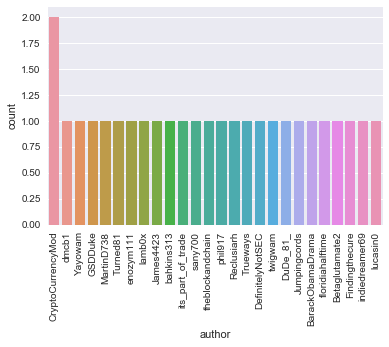

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

sns.countplot(x='author', data=df)
plt.xticks(rotation=90)
plt.show()